<a href="https://colab.research.google.com/github/korkutanapa/stat571/blob/main/stat571_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [81]:
# Path to your Excel file
file_path = "/content/stat_571_data.xlsx"

# Read the first sheet (default)
df = pd.read_excel(file_path)

# Display first few rows
print(df.head())



                    Model Name     Period Noise Level Class  RUN Time  \
0                 BEKO BLVI70F 2023-01-01                 C     210.0   
1           CANDY CDIN 2D350PB 2023-01-01                 C     230.0   
2  WHIRLPOOL WFO 3T133 P 6.5 X 2023-01-01                 B     190.0   
3      WHIRLPOOL WFC 3C33 PF X 2023-01-01                 B     190.0   
4           INDESIT DOFC 2B+16 2023-01-01                 C     200.0   

   En.Cons.100cy En.EFF.Class   Color Comm. Protocols        Constr.2  \
0           94.0            E     NaN              No  BUILT IN/UNDER   
1           93.0            E     NaN         BT+WIFI  BUILT IN/UNDER   
2           85.0            D  Silver              No    FREESTANDING   
3           85.0            D  Silver              No    FREESTANDING   
4          104.0            F   White              No    FREESTANDING   

      Cutler Rack  ... First Activity      Brand Turnover Share Units  \
0              NO  ...   2022NA11NA20       BEKO 

In [82]:
# Analyze the structure of each column: data types, missing values, unique values
structure_summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Unique Values": df.nunique(),
    "Example Value": df.apply(lambda x: x.dropna().iloc[0] if x.dropna().shape[0] > 0 else None)
})

structure_summary

,Data Type,Missing Values,Unique Values,Example Value
Model Name,object,0,927,BEKO BLVI70F
Period,datetime64[ns],0,24,2023-01-01 00:00:00
Noise Level Class,object,75,4,C
RUN Time,float64,345,48,210.0
En.Cons.100cy,float64,254,37,94.0
En.EFF.Class,object,105,7,E
Color,object,3970,4,Silver
Comm. Protocols,object,0,4,No
Constr.2,object,0,2,BUILT IN/UNDER
Cutler Rack,object,106,3,NO


In [83]:
# Select relevant columns
columns_of_interest = ['Price', 'Units', 'Units Share', 'Revenue', 'Revenue Share', 'Price Index']
correlation_matrix = df[columns_of_interest].corr()

correlation_matrix


,Price,Units,Units Share,Revenue,Revenue Share,Price Index
Price,1.000000,-0.195995,-0.196733,0.068691,0.074459,0.997180
Units,-0.195995,1.000000,0.977355,0.923764,0.900540,-0.191675
Units Share,-0.196733,0.977355,1.000000,0.907772,0.923697,-0.198755
Revenue,0.068691,0.923764,0.907772,1.000000,0.981036,0.072264
Revenue Share,0.074459,0.900540,0.923697,0.981036,1.000000,0.072458
Price Index,0.997180,-0.191675,-0.198755,0.072264,0.072458,1.000000


In [84]:
# Drop 'Units Share' and 'Revenue Share' columns
df_cleaned = df.drop(columns=['Units Share', 'Revenue Share','Price Index'])

# Show updated column list
df_cleaned.columns.tolist()


['Model Name',
 'Period',
 'Noise Level Class',
 'RUN Time',
 'En.Cons.100cy',
 'En.EFF.Class',
 'Color',
 'Comm. Protocols',
 'Constr.2',
 'Cutler Rack',
 'Display',
 'Half Load',
 'Integration',
 'Inverter Motor',
 'Material/2',
 'NO OF Placesets',
 'NO. OF Progr.',
 'Noise Level DB',
 'Program Autom.',
 'Remaining Time',
 'Size',
 'Smart Connect',
 'Speed  Function',
 'Start Delay',
 'Water Consumpt.',
 'Water Protect',
 'Selling Shops',
 'First Activity',
 'Brand',
 'Turnover Share Units',
 'Turnover Share Revenue',
 'Price',
 'Revenue',
 'Units']

In [85]:
# Convert 'Price', 'Revenue', and 'Units' columns to integers
df_cleaned['Price'] = df_cleaned['Price'].round().astype('Int64')
df_cleaned['Revenue'] = df_cleaned['Revenue'].round().astype('Int64')
df_cleaned['Units'] = df_cleaned['Units'].round().astype('Int64')

In [86]:
# Calculate the correlation matrix for all numerical columns in the cleaned dataframe
correlation_matrix_cleaned = df_cleaned.corr(numeric_only=True)

# Display the correlation matrix
correlation_matrix_cleaned



,RUN Time,En.Cons.100cy,NO OF Placesets,NO. OF Progr.,Noise Level DB,Water Consumpt.,Selling Shops,Turnover Share Units,Turnover Share Revenue,Price,Revenue,Units
RUN Time,1.000000,-0.176663,-0.146233,-0.257643,0.021248,-0.133388,-0.055961,-0.129056,-0.085415,0.269965,-0.074470,-0.162898
En.Cons.100cy,-0.176663,1.000000,0.063252,-0.123932,0.429406,0.387693,0.204459,0.279826,0.211856,-0.392821,-0.058107,0.067796
NO OF Placesets,-0.146233,0.063252,1.000000,0.220835,-0.483514,0.062404,0.010004,0.060038,0.087299,0.161895,0.172430,0.132277
NO. OF Progr.,-0.257643,-0.123932,0.220835,1.000000,-0.424361,-0.227352,-0.080736,-0.071354,-0.038158,-0.005826,0.062696,0.047204
Noise Level DB,0.021248,0.429406,-0.483514,-0.424361,1.000000,0.398216,0.164535,0.196168,0.101981,-0.439886,-0.148258,-0.004594
Water Consumpt.,-0.133388,0.387693,0.062404,-0.227352,0.398216,1.000000,0.134602,0.233190,0.146440,-0.400208,-0.054011,0.072021
Selling Shops,-0.055961,0.204459,0.010004,-0.080736,0.164535,0.134602,1.000000,0.221911,0.187809,-0.137647,0.694588,0.718598
Turnover Share Units,-0.129056,0.279826,0.060038,-0.071354,0.196168,0.233190,0.221911,1.000000,0.964661,-0.207059,0.167910,0.248149
Turnover Share Revenue,-0.085415,0.211856,0.087299,-0.038158,0.101981,0.146440,0.187809,0.964661,1.000000,-0.031590,0.173184,0.195359
Price,0.269965,-0.392821,0.161895,-0.005826,-0.439886,-0.400208,-0.137647,-0.207059,-0.031590,1.000000,0.068682,-0.195987


In [87]:
# Flatten the correlation matrix and convert to long format
correlation_pairs = correlation_matrix_cleaned.unstack().reset_index()
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove duplicate pairs and self-correlations
correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]
correlation_pairs['Sorted Pair'] = correlation_pairs.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
correlation_pairs = correlation_pairs.drop_duplicates('Sorted Pair').drop(columns='Sorted Pair')

# Sort by absolute correlation value
correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
correlation_pairs_sorted = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)

correlation_pairs_sorted


,Variable 1,Variable 2,Correlation,Abs Correlation
92,Turnover Share Units,Turnover Share Revenue,0.964661,0.964661
131,Revenue,Units,0.923767,0.923767
83,Selling Shops,Units,0.718598,0.718598
82,Selling Shops,Revenue,0.694588,0.694588
28,NO OF Placesets,Noise Level DB,-0.483514,0.483514
...,...,...,...,...
105,Turnover Share Revenue,Price,-0.031590,0.031590
4,RUN Time,Noise Level DB,0.021248,0.021248
30,NO OF Placesets,Selling Shops,0.010004,0.010004
45,NO. OF Progr.,Price,-0.005826,0.005826


In [88]:
# Drop the 'Turnover Share Revenue' column
df_cleaned = df_cleaned.drop(columns=['Turnover Share Revenue'])

# Confirm removal by listing columns
df_cleaned.columns.tolist()


['Model Name',
 'Period',
 'Noise Level Class',
 'RUN Time',
 'En.Cons.100cy',
 'En.EFF.Class',
 'Color',
 'Comm. Protocols',
 'Constr.2',
 'Cutler Rack',
 'Display',
 'Half Load',
 'Integration',
 'Inverter Motor',
 'Material/2',
 'NO OF Placesets',
 'NO. OF Progr.',
 'Noise Level DB',
 'Program Autom.',
 'Remaining Time',
 'Size',
 'Smart Connect',
 'Speed  Function',
 'Start Delay',
 'Water Consumpt.',
 'Water Protect',
 'Selling Shops',
 'First Activity',
 'Brand',
 'Turnover Share Units',
 'Price',
 'Revenue',
 'Units']

In [89]:
# Analyze the structure of each column: data types, missing values, unique values
structure_summary = pd.DataFrame({
    "Data Type": df_cleaned.dtypes,
    "Missing Values": df_cleaned.isnull().sum(),
    "Unique Values": df_cleaned.nunique(),
    "Example Value": df_cleaned.apply(lambda x: x.dropna().iloc[0] if x.dropna().shape[0] > 0 else None)
})

structure_summary

,Data Type,Missing Values,Unique Values,Example Value
Model Name,object,0,927,BEKO BLVI70F
Period,datetime64[ns],0,24,2023-01-01 00:00:00
Noise Level Class,object,75,4,C
RUN Time,float64,345,48,210.0
En.Cons.100cy,float64,254,37,94.0
En.EFF.Class,object,105,7,E
Color,object,3970,4,Silver
Comm. Protocols,object,0,4,No
Constr.2,object,0,2,BUILT IN/UNDER
Cutler Rack,object,106,3,NO


In [90]:
# Replace all NA-like values with np.nan (formal NA for regression in Python)
import numpy as np

df_cleaned = df_cleaned.replace(to_replace=["NA", "N/A", "", "na", "n/a"], value=np.nan)

# Check how many missing values remain per column
na_summary = df_cleaned.isna().sum()
na_summary[na_summary > 0]


,0
Noise Level Class,75
RUN Time,345
En.Cons.100cy,254
En.EFF.Class,105
Color,3970
Cutler Rack,106
Display,52
Half Load,59
Inverter Motor,68
Material/2,5990


In [91]:
# Drop 'Color' and 'Material/2' columns due to excessive missing values
df_cleaned = df_cleaned.drop(columns=['Color', 'Material/2','First Activity','Model Name'])

# Confirm removal
df_cleaned.columns.tolist()


['Period',
 'Noise Level Class',
 'RUN Time',
 'En.Cons.100cy',
 'En.EFF.Class',
 'Comm. Protocols',
 'Constr.2',
 'Cutler Rack',
 'Display',
 'Half Load',
 'Integration',
 'Inverter Motor',
 'NO OF Placesets',
 'NO. OF Progr.',
 'Noise Level DB',
 'Program Autom.',
 'Remaining Time',
 'Size',
 'Smart Connect',
 'Speed  Function',
 'Start Delay',
 'Water Consumpt.',
 'Water Protect',
 'Selling Shops',
 'Brand',
 'Turnover Share Units',
 'Price',
 'Revenue',
 'Units']

In [92]:
# Extract 'year_month' from 'Period' column
df_cleaned['year_month'] = df_cleaned['Period'].dt.to_period('M').astype(str)

# Drop the original timestamp and the extracted feature
df_cleaned.drop(columns=['Period'], inplace=True)

# Confirm changes
df_cleaned.head()


,Noise Level Class,RUN Time,En.Cons.100cy,En.EFF.Class,Comm. Protocols,Constr.2,Cutler Rack,Display,Half Load,Integration,...,Start Delay,Water Consumpt.,Water Protect,Selling Shops,Brand,Turnover Share Units,Price,Revenue,Units,year_month
0,C,210.0,94.0,E,No,BUILT IN/UNDER,NO,NO,YES,FULLY,...,YES,11.4,YES,342.000,BEKO,0.2462,278,979462,3528,2023-01
1,C,230.0,93.0,E,BT+WIFI,BUILT IN/UNDER,NO,YES,YES,FULLY,...,YES,10.4,NO,250.829,CANDY,0.1688,309,597809,1936,2023-01
2,B,190.0,85.0,D,No,FREESTANDING,NO,YES,YES,NO,...,YES,6.5,YES,191.000,WHIRLPOOL,0.1075,584,923442,1580,2023-01
3,B,190.0,85.0,D,No,FREESTANDING,FULL SIZE RACK,YES,YES,NO,...,YES,9.5,YES,284.000,WHIRLPOOL,0.1863,551,809824,1471,2023-01
4,C,200.0,104.0,F,No,FREESTANDING,NO,NO,YES,NO,...,YES,12.0,NO,243.571,INDESIT,0.1470,336,460209,1369,2023-01


In [93]:
# Save the cleaned dataframe to a new Excel file
output_path = "/content/stat_571_data_cleaned.xlsx"
df_cleaned.to_excel(output_path, index=False)

In [94]:
# Analyze the structure of each column: data types, missing values, unique values
structure_summary = pd.DataFrame({
    "Data Type": df_cleaned.dtypes,
    "Missing Values": df_cleaned.isnull().sum(),
    "Unique Values": df_cleaned.nunique(),
    "Example Value": df_cleaned.apply(lambda x: x.dropna().iloc[0] if x.dropna().shape[0] > 0 else None)
})

structure_summary

,Data Type,Missing Values,Unique Values,Example Value
Noise Level Class,object,75,4,C
RUN Time,float64,345,48,210.0
En.Cons.100cy,float64,254,37,94.0
En.EFF.Class,object,105,7,E
Comm. Protocols,object,0,4,No
Constr.2,object,0,2,BUILT IN/UNDER
Cutler Rack,object,106,3,NO
Display,object,52,2,NO
Half Load,object,59,2,YES
Integration,object,0,3,FULLY


In [95]:
df_model=df_cleaned.copy()

ANALYZE CATEGORY 1: This analyze is based on the classical dw properties and their effect on sales price and reveneue.


In [96]:
df_model.columns.tolist()

['Noise Level Class',
 'RUN Time',
 'En.Cons.100cy',
 'En.EFF.Class',
 'Comm. Protocols',
 'Constr.2',
 'Cutler Rack',
 'Display',
 'Half Load',
 'Integration',
 'Inverter Motor',
 'NO OF Placesets',
 'NO. OF Progr.',
 'Noise Level DB',
 'Program Autom.',
 'Remaining Time',
 'Size',
 'Smart Connect',
 'Speed  Function',
 'Start Delay',
 'Water Consumpt.',
 'Water Protect',
 'Selling Shops',
 'Brand',
 'Turnover Share Units',
 'Price',
 'Revenue',
 'Units',
 'year_month']

In [101]:
category_1=['Noise Level Class',
 'RUN Time',
 'En.Cons.100cy',
 'En.EFF.Class',
 'Comm. Protocols',
 'Constr.2',
 'Cutler Rack',
 'Display',
 'Half Load',
 'Integration',
 'Inverter Motor',
 'NO OF Placesets',
 'NO. OF Progr.',
 'Noise Level DB',
 'Program Autom.',
 'Remaining Time',
 'Size',
 'Smart Connect',
 'Speed  Function',
 'Start Delay',
 'Water Consumpt.',
  'Selling Shops',
 'Water Protect']

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Define target variables
y1 = df_model["Price"]
y2 = df_model["Units"]
y3 = df_model["Revenue"]

# Drop target variables from the features
X = df_model[category_1]

In [103]:
# Separate columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [104]:
from sklearn.preprocessing import OneHotEncoder

# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Drop high-cardinality categoricals (e.g., cardinality > 25)
low_card_cat_cols = [col for col in cat_cols if X[col].nunique() <= 21]

# One-hot encode low-cardinality categorical features only
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_cat = encoder.fit_transform(X[low_card_cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(low_card_cat_cols), index=X.index)

# Drop original categorical columns and concatenate encoded features
X_encoded = pd.concat([X[num_cols], encoded_cat_df], axis=1)

# Keep this version for further regression
X_encoded.head()


,RUN Time,En.Cons.100cy,NO OF Placesets,NO. OF Progr.,Noise Level DB,Water Consumpt.,Selling Shops,Noise Level Class_A,Noise Level Class_B,Noise Level Class_C,...,Smart Connect_nan,Speed Function_NO,Speed Function_YES,Speed Function_nan,Start Delay_NO,Start Delay_YES,Start Delay_nan,Water Protect_NO,Water Protect_YES,Water Protect_nan
0,210.0,94.0,13,4.0,48,11.4,342.000,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,230.0,93.0,13,9.0,46,10.4,250.829,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,190.0,85.0,14,10.0,43,6.5,191.000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,190.0,85.0,14,8.0,43,9.5,284.000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,200.0,104.0,14,6.0,46,12.0,243.571,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [105]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Define the model (outside the function if you want to reuse the instance)
model = HistGradientBoostingRegressor(random_state=0)

from sklearn.inspection import permutation_importance

def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = HistGradientBoostingRegressor(random_state=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
    importances = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False).head(10)

    return mae, r2, importances

# Evaluate for each target
mae_y1, r2_y1, imp_y1 = evaluate_model(X_encoded, y1)
mae_y2, r2_y2, imp_y2 = evaluate_model(X_encoded, y2)
mae_y3, r2_y3, imp_y3 = evaluate_model(X_encoded, y3)

# Summarize results
summary_df = pd.DataFrame({
    "Target": ["Price", "Units", "Revenue"],
    "MAE": [mae_y1, mae_y2, mae_y3],
    "R²": [r2_y1, r2_y2, r2_y3]
})

# Display
print("Model Evaluation Summary:")
print(summary_df, "\n")

print("Top 10 Important Features for y1 (Price):\n", imp_y1, "\n")
print("Top 10 Important Features for y2 (Units):\n", imp_y2, "\n")
print("Top 10 Important Features for y3 (Revenue):\n", imp_y3)

Model Evaluation Summary:
    Target           MAE        R²
0    Price     54.160439  0.847145
1    Units     53.588295  0.769926
2  Revenue  29282.441174  0.770866 

Top 10 Important Features for y1 (Price):
 Cutler Rack_FULL SIZE RACK    0.264231
Water Consumpt.               0.217613
Noise Level DB                0.101261
RUN Time                      0.100384
En.Cons.100cy                 0.079085
NO. OF Progr.                 0.051444
Selling Shops                 0.042433
Comm. Protocols_WIFI          0.041501
NO OF Placesets               0.030010
Program Autom._NO             0.026436
dtype: float64 

Top 10 Important Features for y2 (Units):
 Selling Shops              1.728890
Constr.2_BUILT IN/UNDER    0.066193
En.Cons.100cy              0.061297
RUN Time                   0.047906
Noise Level DB             0.047643
NO. OF Progr.              0.038905
NO OF Placesets            0.021901
Water Consumpt.            0.019965
Display_NO                 0.014372
Half Load_NO   

ARM study

In [ ]:
X

,Noise Level Class,RUN Time,En.Cons.100cy,En.EFF.Class,Comm. Protocols,Constr.2,Cutler Rack,Display,Half Load,Integration,...,NO. OF Progr.,Noise Level DB,Program Autom.,Remaining Time,Size,Smart Connect,Speed Function,Start Delay,Water Consumpt.,Water Protect
0,C,210.0,94.0,E,No,BUILT IN/UNDER,NO,NO,YES,FULLY,...,4.0,48,NO,NO,FULLSIZE,NO,NO,YES,11.4,YES
1,C,230.0,93.0,E,BT+WIFI,BUILT IN/UNDER,NO,YES,YES,FULLY,...,9.0,46,YES,YES,FULLSIZE,SMART APP CTRL.,NO,YES,10.4,NO
2,B,190.0,85.0,D,No,FREESTANDING,NO,YES,YES,NO,...,10.0,43,YES,YES,FULLSIZE,NO,NO,YES,6.5,YES
3,B,190.0,85.0,D,No,FREESTANDING,FULL SIZE RACK,YES,YES,NO,...,8.0,43,YES,YES,FULLSIZE,NO,NO,YES,9.5,YES
4,C,200.0,104.0,F,No,FREESTANDING,NO,NO,YES,NO,...,6.0,46,NO,NO,FULLSIZE,NO,NO,YES,12.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,B,240.0,95.0,E,No,FREESTANDING,FULL SIZE RACK,YES,NO,NO,...,6.0,44,YES,YES,FULLSIZE,NO,NO,YES,10.5,YES
7928,B,225.0,94.0,E,WIFI,BUILT IN/UNDER,FULL SIZE RACK,YES,YES,FULLY,...,6.0,44,YES,YES,FULLSIZE,VOICE CONTROL,YES,YES,9.5,YES
7929,C,224.0,75.0,C,No,FREESTANDING,NO,YES,YES,NO,...,6.0,46,YES,NO,FULLSIZE,NO,YES,YES,9.5,YES
7930,C,240.0,85.0,D,No,BUILT IN/UNDER,FULL SIZE RACK,YES,NO,FULLY,...,6.0,45,YES,YES,FULLSIZE,NO,NO,YES,9.9,YES


In [ ]:
from sklearn.cluster import KMeans

# 1. Identify column types
object_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include='number').columns.tolist()

In [ ]:
object_cols

['Noise Level Class',
 'En.EFF.Class',
 'Comm. Protocols',
 'Constr.2',
 'Cutler Rack',
 'Display',
 'Half Load',
 'Integration',
 'Inverter Motor',
 'Program Autom.',
 'Remaining Time',
 'Size',
 'Smart Connect',
 'Speed  Function',
 'Start Delay',
 'Water Protect']

In [ ]:
numeric_cols

['RUN Time',
 'En.Cons.100cy',
 'NO OF Placesets',
 'NO. OF Progr.',
 'Noise Level DB',
 'Water Consumpt.']

In [ ]:
# 2. Apply quantile binning to numeric columns
def quantile_binning(series, q=4):
    try:
        binned = pd.qcut(series, q=q, duplicates='drop')
        return binned.astype(str)
    except:
        return pd.Series(['NA' if pd.isna(x) else 'error' for x in series])

# 3. Create a new DataFrame for Apriori
X_binned = pd.DataFrame(index=X.index)

# Keep object columns as-is
X_binned[object_cols] = X[object_cols].astype(str)

# Apply binning
for col in numeric_cols:
    X_binned[col] = quantile_binning(X[col])

# Now X_binned is ready for Apriori


In [ ]:
X_binned

,Noise Level Class,En.EFF.Class,Comm. Protocols,Constr.2,Cutler Rack,Display,Half Load,Integration,Inverter Motor,Program Autom.,...,Smart Connect,Speed Function,Start Delay,Water Protect,RUN Time,En.Cons.100cy,NO OF Placesets,NO. OF Progr.,Noise Level DB,Water Consumpt.
0,C,E,No,BUILT IN/UNDER,NO,NO,YES,FULLY,NO,NO,...,NO,NO,YES,YES,"(205.0, 225.0]","(85.0, 94.0]","(5.999, 13.0]","(2.999, 5.0]","(46.0, 53.0]","(9.95, 16.0]"
1,C,E,BT+WIFI,BUILT IN/UNDER,NO,YES,YES,FULLY,NO,YES,...,SMART APP CTRL.,NO,YES,NO,"(225.0, 240.0]","(85.0, 94.0]","(5.999, 13.0]","(7.0, 12.0]","(44.0, 46.0]","(9.95, 16.0]"
2,B,D,No,FREESTANDING,NO,YES,YES,NO,NO,YES,...,NO,NO,YES,YES,"(141.999, 205.0]","(75.0, 85.0]","(13.0, 14.0]","(7.0, 12.0]","(-0.001, 43.0]","(6.499, 9.5]"
3,B,D,No,FREESTANDING,FULL SIZE RACK,YES,YES,NO,NO,YES,...,NO,NO,YES,YES,"(141.999, 205.0]","(75.0, 85.0]","(13.0, 14.0]","(7.0, 12.0]","(-0.001, 43.0]","(6.499, 9.5]"
4,C,F,No,FREESTANDING,NO,NO,YES,NO,NO,NO,...,NO,NO,YES,NO,"(141.999, 205.0]","(94.0, 262.0]","(13.0, 14.0]","(5.0, 6.0]","(44.0, 46.0]","(9.95, 16.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,B,E,No,FREESTANDING,FULL SIZE RACK,YES,NO,NO,YES,YES,...,NO,NO,YES,YES,"(225.0, 240.0]","(94.0, 262.0]","(13.0, 14.0]","(5.0, 6.0]","(43.0, 44.0]","(9.95, 16.0]"
7928,B,E,WIFI,BUILT IN/UNDER,FULL SIZE RACK,YES,YES,FULLY,YES,YES,...,VOICE CONTROL,YES,YES,YES,"(205.0, 225.0]","(85.0, 94.0]","(5.999, 13.0]","(5.0, 6.0]","(43.0, 44.0]","(6.499, 9.5]"
7929,C,C,No,FREESTANDING,NO,YES,YES,NO,NO,YES,...,NO,YES,YES,YES,"(205.0, 225.0]","(45.999, 75.0]","(13.0, 14.0]","(5.0, 6.0]","(44.0, 46.0]","(6.499, 9.5]"
7930,C,D,No,BUILT IN/UNDER,FULL SIZE RACK,YES,NO,FULLY,NO,YES,...,NO,NO,YES,YES,"(225.0, 240.0]","(75.0, 85.0]","(13.0, 14.0]","(5.0, 6.0]","(44.0, 46.0]","(9.5, 9.95]"


In [ ]:
# Assuming y1, y2, y3 are Series or columns in X
def quantile_binning_target(series, q=4, name='y'):
    try:
        binned = pd.qcut(series, q=q, duplicates='drop')
        return binned.astype(str).rename(f"{name}_binned")
    except:
        return pd.Series(['NA' if pd.isna(x) else 'error' for x in series], name=f"{name}_binned")

# Apply to each target variable
y1_binned = quantile_binning_target(y1, q=4, name='y1')
y2_binned = quantile_binning_target(y2, q=4, name='y2')
y3_binned = quantile_binning_target(y3, q=4, name='y3')

# Combine into a single DataFrame
binned_targets = pd.concat([y1_binned, y2_binned, y3_binned], axis=1)


In [ ]:
# Combine X_binned with y1_binned
price_data = pd.concat([X_binned.copy(), y1_binned], axis=1)


In [ ]:
price_data

,Noise Level Class,En.EFF.Class,Comm. Protocols,Constr.2,Cutler Rack,Display,Half Load,Integration,Inverter Motor,Program Autom.,...,Speed Function,Start Delay,Water Protect,RUN Time,En.Cons.100cy,NO OF Placesets,NO. OF Progr.,Noise Level DB,Water Consumpt.,y1_binned
0,C,E,No,BUILT IN/UNDER,NO,NO,YES,FULLY,NO,NO,...,NO,YES,YES,"(205.0, 225.0]","(85.0, 94.0]","(5.999, 13.0]","(2.999, 5.0]","(46.0, 53.0]","(9.95, 16.0]","(82.999, 461.0]"
1,C,E,BT+WIFI,BUILT IN/UNDER,NO,YES,YES,FULLY,NO,YES,...,NO,YES,NO,"(225.0, 240.0]","(85.0, 94.0]","(5.999, 13.0]","(7.0, 12.0]","(44.0, 46.0]","(9.95, 16.0]","(82.999, 461.0]"
2,B,D,No,FREESTANDING,NO,YES,YES,NO,NO,YES,...,NO,YES,YES,"(141.999, 205.0]","(75.0, 85.0]","(13.0, 14.0]","(7.0, 12.0]","(-0.001, 43.0]","(6.499, 9.5]","(574.0, 722.0]"
3,B,D,No,FREESTANDING,FULL SIZE RACK,YES,YES,NO,NO,YES,...,NO,YES,YES,"(141.999, 205.0]","(75.0, 85.0]","(13.0, 14.0]","(7.0, 12.0]","(-0.001, 43.0]","(6.499, 9.5]","(461.0, 574.0]"
4,C,F,No,FREESTANDING,NO,NO,YES,NO,NO,NO,...,NO,YES,NO,"(141.999, 205.0]","(94.0, 262.0]","(13.0, 14.0]","(5.0, 6.0]","(44.0, 46.0]","(9.95, 16.0]","(82.999, 461.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,B,E,No,FREESTANDING,FULL SIZE RACK,YES,NO,NO,YES,YES,...,NO,YES,YES,"(225.0, 240.0]","(94.0, 262.0]","(13.0, 14.0]","(5.0, 6.0]","(43.0, 44.0]","(9.95, 16.0]","(574.0, 722.0]"
7928,B,E,WIFI,BUILT IN/UNDER,FULL SIZE RACK,YES,YES,FULLY,YES,YES,...,YES,YES,YES,"(205.0, 225.0]","(85.0, 94.0]","(5.999, 13.0]","(5.0, 6.0]","(43.0, 44.0]","(6.499, 9.5]","(722.0, 1999.0]"
7929,C,C,No,FREESTANDING,NO,YES,YES,NO,NO,YES,...,YES,YES,YES,"(205.0, 225.0]","(45.999, 75.0]","(13.0, 14.0]","(5.0, 6.0]","(44.0, 46.0]","(6.499, 9.5]","(461.0, 574.0]"
7930,C,D,No,BUILT IN/UNDER,FULL SIZE RACK,YES,NO,FULLY,NO,YES,...,NO,YES,YES,"(225.0, 240.0]","(75.0, 85.0]","(13.0, 14.0]","(5.0, 6.0]","(44.0, 46.0]","(9.5, 9.95]","(82.999, 461.0]"


In [ ]:
# Combine price_data with y2_binned
units_data = pd.concat([price_data.copy(), y2_binned], axis=1)


In [ ]:
transaction_price = []

for _, row in price_data.iterrows():
    transaction = [f"{col}={val}" for col, val in row.items() if val != 'NA']
    transaction_price.append(transaction)


In [ ]:
transaction_unit = []

for _, row in units_data.iterrows():
    transaction = [f"{col}={val}" for col, val in row.items() if val != 'NA']
    transaction_unit.append(transaction)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# ---------------------
# Process transaction_price
# ---------------------

# One-hot encode transaction_price
te_price = TransactionEncoder()
te_array_price = te_price.fit(transaction_price).transform(transaction_price)
df_price = pd.DataFrame(te_array_price, columns=te_price.columns_)

# Generate frequent itemsets with min_support=0.2
freq_itemsets_price = apriori(df_price, min_support=0.1, use_colnames=True)

# Generate association rules with confidence threshold 0.9
rules_price = association_rules(freq_itemsets_price, metric="confidence", min_threshold=0.5)

# Filter rules so that the consequents include only items that start with "y1_binned="
rules_price = rules_price[
    rules_price['consequents'].apply(lambda cons: all(item.startswith("y1_binned=") for item in cons))
]

# For each unique y1_binned category in the consequents, print the top rule (by confidence and support)
unique_y1 = set(item for cons in rules_price['consequents'] for item in cons if item.startswith("y1_binned="))
print("Association rules for transaction_price (Consequent: y1_binned)\n")
for cat in unique_y1:
    subset = rules_price[rules_price['consequents'].apply(lambda cons: cat in cons)]
    if not subset.empty:
        # Sort by confidence descending then support descending; take the top rule
        top_rule = subset.sort_values(['confidence', 'support'], ascending=False).iloc[0]
        print("Top rule for", cat)
        print("Antecedents:", top_rule['antecedents'])
        print("Consequents:", top_rule['consequents'])
        print("Support:", top_rule['support'])
        print("Confidence:", top_rule['confidence'])
        print("Lift:", top_rule['lift'])
        print("-" * 40)

# ---------------------
# Process transaction_unit
# ---------------------

# One-hot encode transaction_unit
te_unit = TransactionEncoder()
te_array_unit = te_unit.fit(transaction_unit).transform(transaction_unit)
df_unit = pd.DataFrame(te_array_unit, columns=te_unit.columns_)

# Generate frequent itemsets with min_support=0.2
freq_itemsets_unit = apriori(df_unit, min_support=0.1, use_colnames=True)

# Generate association rules with confidence threshold 0.9
rules_unit = association_rules(freq_itemsets_unit, metric="confidence", min_threshold=0.2)

# Filter rules so that the consequents include only items that start with "y2_binned="
rules_unit = rules_unit[
    rules_unit['consequents'].apply(lambda cons: all(item.startswith("y2_binned=") for item in cons))
]

# For each unique y2_binned category in the consequents, print the top rule (by confidence and support)
unique_y2 = set(item for cons in rules_unit['consequents'] for item in cons if item.startswith("y2_binned="))
print("\nAssociation rules for transaction_unit (Consequent: y2_binned)\n")
for cat in unique_y2:
    subset = rules_unit[rules_unit['consequents'].apply(lambda cons: cat in cons)]
    if not subset.empty:
        # Sort by confidence descending then support descending; take the top rule
        top_rule = subset.sort_values(['confidence', 'support'], ascending=False).iloc[0]
        print("Top rule for", cat)
        print("Antecedents:", top_rule['antecedents'])
        print("Consequents:", top_rule['consequents'])
        print("Support:", top_rule['support'])
        print("Confidence:", top_rule['confidence'])
        print("Lift:", top_rule['lift'])
        print("-" * 40)


Association rules for transaction_price (Consequent: y1_binned)

Top rule for y1_binned=(722.0, 1999.0]
Antecedents: frozenset({'Water Consumpt.=(6.499, 9.5]', 'Speed  Function=YES', 'Water Protect=YES', 'NO OF Placesets=(13.0, 14.0]', 'Remaining Time=YES', 'Noise Level Class=B', 'Cutler Rack=FULL SIZE RACK'})
Consequents: frozenset({'y1_binned=(722.0, 1999.0]'})
Support: 0.10501765002521432
Confidence: 0.7956064947468958
Lift: 3.1888583710623437
----------------------------------------
Top rule for y1_binned=(82.999, 461.0]
Antecedents: frozenset({'Program Autom.=NO', 'Noise Level Class=C', 'Start Delay=YES', 'Speed  Function=NO'})
Consequents: frozenset({'y1_binned=(82.999, 461.0]'})
Support: 0.10237014624306606
Confidence: 0.7868217054263567
Lift: 3.1236585422631933
----------------------------------------

Association rules for transaction_unit (Consequent: y2_binned)

Top rule for y2_binned=(79.0, 130.0]
Antecedents: frozenset({'Water Protect=YES', 'NO OF Placesets=(5.999, 13.0]',

END OF ARM

In [106]:
df.columns

Index(['Model Name', 'Period', 'Noise Level Class', 'RUN Time',
       'En.Cons.100cy', 'En.EFF.Class', 'Color', 'Comm. Protocols', 'Constr.2',
       'Cutler Rack', 'Display', 'Half Load', 'Integration', 'Inverter Motor',
       'Material/2', 'NO OF Placesets', 'NO. OF Progr.', 'Noise Level DB',
       'Program Autom.', 'Remaining Time', 'Size', 'Smart Connect',
       'Speed  Function', 'Start Delay', 'Water Consumpt.', 'Water Protect',
       'Selling Shops', 'First Activity', 'Brand', 'Turnover Share Units',
       'Turnover Share Revenue', 'Price', 'Revenue', 'Revenue Share', 'Units',
       'Units Share', 'Price Index'],
      dtype='object')

In [107]:
columns_of_price=['Model Name','Selling Shops','Brand','Price','Units','Period']
df_analyze_2=df[columns_of_price]

In [108]:
df_analyze_2

,Model Name,Selling Shops,Brand,Price,Units,Period
0,BEKO BLVI70F,342.000,BEKO,277.625,3528.000,2023-01-01
1,CANDY CDIN 2D350PB,250.829,CANDY,308.803,1935.894,2023-01-01
2,WHIRLPOOL WFO 3T133 P 6.5 X,191.000,WHIRLPOOL,584.457,1580.000,2023-01-01
3,WHIRLPOOL WFC 3C33 PF X,284.000,WHIRLPOOL,550.526,1471.000,2023-01-01
4,INDESIT DOFC 2B+16,243.571,INDESIT,336.179,1368.940,2023-01-01
...,...,...,...,...,...,...
7927,ELECTROLUX ESM48210SW,67.283,ELECTROLUX,634.699,51.300,2024-12-01
7928,BOSCH SMV4HVX37E,23.667,BOSCH,838.550,51.258,2024-12-01
7929,BEKO BDFN26446WA,20.000,BEKO,474.261,51.000,2024-12-01
7930,BEKO BDIN16435,29.000,BEKO,310.235,51.000,2024-12-01


In [109]:
# Save the cleaned dataframe to a new Excel file
output_path = "/content/model_analyze.xlsx"
df_analyze_2.to_excel(output_path, index=False)

<Figure size 1200x600 with 0 Axes>

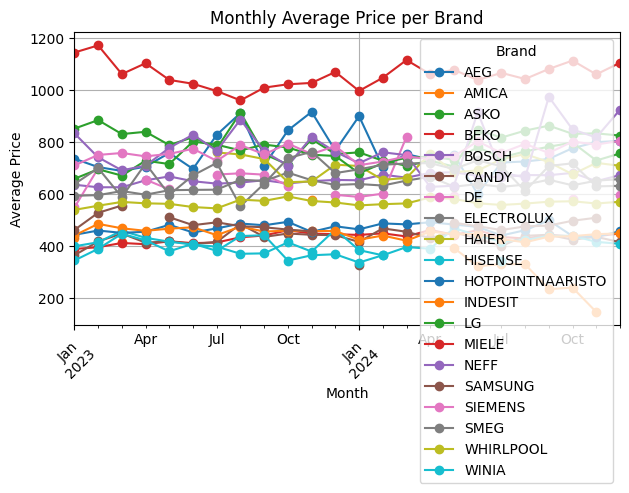

Brand,AEG,AMICA,ASKO,BEKO,BOSCH,CANDY,DE,ELECTROLUX,HAIER,HISENSE,HOTPOINTNAARISTO,INDESIT,LG,MIELE,NEFF,SAMSUNG,SIEMENS,SMEG,WHIRLPOOL,WINIA
Period,,,,,,,,,,,,,,,,,,,,
2023-01-01,736.152667,429.068000,852.013000,388.086515,635.833568,363.912200,548.070000,593.124143,NaN,398.427500,442.699375,440.240769,658.668333,1145.326833,833.693000,461.511667,710.127236,638.165000,538.772630,343.756000
2023-02-01,703.746154,NaN,884.865667,395.101259,625.936261,417.049231,698.792000,595.688571,NaN,414.053500,459.270667,484.821846,695.440500,1172.825333,741.456000,527.601000,750.593971,699.761167,554.875020,388.693500
2023-03-01,688.983500,415.299000,831.001500,411.328946,626.145929,447.646800,NaN,611.279520,NaN,458.723667,450.146062,467.832154,670.964500,1062.135882,691.237833,555.643000,758.098314,588.073000,569.505354,446.868000
2023-04-01,705.512900,NaN,839.830000,406.541740,652.867319,412.638818,655.457667,597.399000,NaN,430.954500,454.543063,458.103250,728.429500,1104.033000,709.471750,NaN,745.134774,717.250286,564.135917,421.435500
2023-05-01,758.156000,NaN,788.564000,417.642300,667.755088,417.568300,617.795000,614.621364,NaN,416.280000,481.145533,466.418182,715.459000,1039.699000,777.668250,510.521500,754.667342,596.902111,562.094870,379.104750
2023-06-01,696.646800,NaN,819.035500,410.622414,649.200060,407.477000,NaN,615.907222,NaN,404.873667,451.923000,471.789200,802.186500,1024.905769,828.860000,479.950500,774.365343,671.803000,549.735306,408.678500
2023-07-01,828.149600,NaN,775.395500,413.111443,640.031141,415.132765,674.934000,616.650964,759.998000,397.135333,467.310235,441.424857,790.047000,996.870762,766.378667,490.813500,727.734659,719.817400,544.633121,380.819333
2023-08-01,911.943333,NaN,914.039000,433.198623,644.139328,484.334222,679.853000,655.062167,752.580000,369.579333,486.298933,474.445615,767.997667,960.858231,887.146000,475.940000,788.513000,552.918333,578.343687,437.854000
2023-09-01,709.535500,NaN,754.013000,440.042217,653.085902,434.681000,674.625000,650.341120,734.825000,371.216000,479.529929,455.409143,790.607500,1009.975875,764.581000,471.764000,752.926226,639.903000,573.518607,441.217000


In [110]:
import matplotlib.pyplot as plt

# Convert Period column to datetime
df['Period'] = pd.to_datetime(df['Period'])

# Group by Period and Brand, then calculate average price
price_trend = df.groupby(['Period', 'Brand'])['Price'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
price_trend.plot(marker='o')
plt.title('Monthly Average Price per Brand')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Brand')
plt.show()

price_trend


<Figure size 1400x800 with 0 Axes>

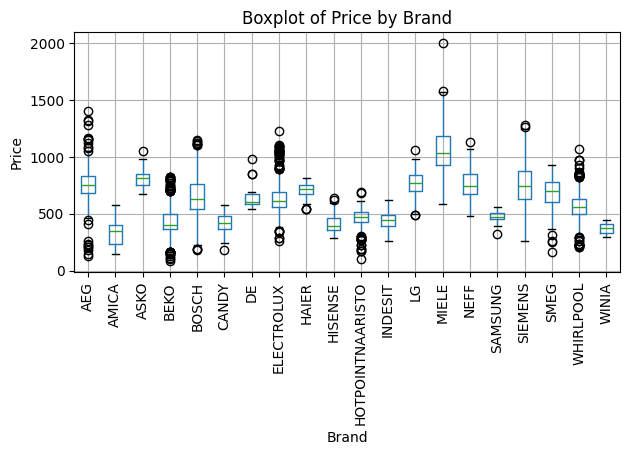

In [111]:
# Plot a boxplot of price grouped by brand
plt.figure(figsize=(14, 8))
df.boxplot(column='Price', by='Brand', rot=90)
plt.title('Boxplot of Price by Brand')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('Brand')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
X

,Noise Level Class,RUN Time,En.Cons.100cy,En.EFF.Class,Comm. Protocols,Constr.2,Cutler Rack,Display,Half Load,Integration,...,Noise Level DB,Program Autom.,Remaining Time,Size,Smart Connect,Speed Function,Start Delay,Water Consumpt.,Selling Shops,Water Protect
0,C,210.0,94.0,E,No,BUILT IN/UNDER,NO,NO,YES,FULLY,...,48,NO,NO,FULLSIZE,NO,NO,YES,11.4,342.000,YES
1,C,230.0,93.0,E,BT+WIFI,BUILT IN/UNDER,NO,YES,YES,FULLY,...,46,YES,YES,FULLSIZE,SMART APP CTRL.,NO,YES,10.4,250.829,NO
2,B,190.0,85.0,D,No,FREESTANDING,NO,YES,YES,NO,...,43,YES,YES,FULLSIZE,NO,NO,YES,6.5,191.000,YES
3,B,190.0,85.0,D,No,FREESTANDING,FULL SIZE RACK,YES,YES,NO,...,43,YES,YES,FULLSIZE,NO,NO,YES,9.5,284.000,YES
4,C,200.0,104.0,F,No,FREESTANDING,NO,NO,YES,NO,...,46,NO,NO,FULLSIZE,NO,NO,YES,12.0,243.571,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,B,240.0,95.0,E,No,FREESTANDING,FULL SIZE RACK,YES,NO,NO,...,44,YES,YES,FULLSIZE,NO,NO,YES,10.5,67.283,YES
7928,B,225.0,94.0,E,WIFI,BUILT IN/UNDER,FULL SIZE RACK,YES,YES,FULLY,...,44,YES,YES,FULLSIZE,VOICE CONTROL,YES,YES,9.5,23.667,YES
7929,C,224.0,75.0,C,No,FREESTANDING,NO,YES,YES,NO,...,46,YES,NO,FULLSIZE,NO,YES,YES,9.5,20.000,YES
7930,C,240.0,85.0,D,No,BUILT IN/UNDER,FULL SIZE RACK,YES,NO,FULLY,...,45,YES,YES,FULLSIZE,NO,NO,YES,9.9,29.000,YES


In [113]:
from os import XATTR_REPLACE
# Save the cleaned dataframe to a new Excel file
output_path = "/content/X_stat_571.xlsx"
df.to_excel(output_path, index=False)

modelling price in terms of selling shops and brands

In [114]:
# Ensure 'Period' is in month-year format
df['Period'] = df['Period'].dt.to_period('M')

# Calculate monthly total units
monthly_units_sum = df.groupby('Period')['Units'].sum().rename('Monthly_Total_Units')

# Merge the monthly total back into the original dataframe
df = df.merge(monthly_units_sum, on='Period')

# Calculate the percentage of each row's Units
df['Percentage_Unit'] = (df['Units'] / df['Monthly_Total_Units']) * 100


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare feature matrix X and target vector y
X = df[['Selling Shops', 'Brand']]
y = df['Price']

# Define preprocessing: One-hot encode 'Brand'
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Brand'])
], remainder='passthrough')  # Keep 'Selling Shops' as is

from xgboost import XGBRegressor

# Create XGBoost pipeline with same preprocessing
xgb_model = make_pipeline(preprocessor, XGBRegressor(objective='reg:squarederror', random_state=42))
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_xgb, r2_xgb

(99.6525977900889, 0.5683959532086403)

modelling units in terms of selling shops brand and price

In [117]:
df_cleaned.columns

Index(['Noise Level Class', 'RUN Time', 'En.Cons.100cy', 'En.EFF.Class',
       'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display', 'Half Load',
       'Integration', 'Inverter Motor', 'NO OF Placesets', 'NO. OF Progr.',
       'Noise Level DB', 'Program Autom.', 'Remaining Time', 'Size',
       'Smart Connect', 'Speed  Function', 'Start Delay', 'Water Consumpt.',
       'Water Protect', 'Selling Shops', 'Brand', 'Turnover Share Units',
       'Price', 'Revenue', 'Units', 'year_month'],
      dtype='object')

modelling price by all

In [118]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = df[[ 'Noise Level Class', 'RUN Time', 'En.Cons.100cy',
       'En.EFF.Class', 'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display',
       'Half Load', 'Integration', 'Inverter Motor', 'NO OF Placesets',
       'NO. OF Progr.', 'Noise Level DB', 'Program Autom.', 'Remaining Time',
       'Size', 'Smart Connect', 'Speed  Function', 'Start Delay',
       'Water Consumpt.', 'Water Protect', 'Selling Shops', 'Brand']]
y = df['Price']

# Identify categorical columns
categorical_cols = [ 'Noise Level Class',
       'En.EFF.Class', 'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display',
       'Half Load', 'Integration', 'Inverter Motor', 'NO OF Placesets',
       'NO. OF Progr.',  'Program Autom.', 'Remaining Time',
       'Size', 'Smart Connect', 'Speed  Function', 'Start Delay',
        'Water Protect', 'Brand']


# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Define XGBoost pipeline
xgb_pipeline = make_pipeline(
    preprocessor,
    XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=42)
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
xgb_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Access the trained XGBoost model from the pipeline
xgb_model = xgb_pipeline.named_steps['xgbregressor']

# Get feature names after preprocessing
feature_names = xgb_pipeline.named_steps['columntransformer'].get_feature_names_out()

# Create a DataFrame of feature importances
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print top 10 most important features
print(importances.head(10))


MAE: 52.79
R² Score: 0.861
                             Feature  Importance
92                  cat__Brand_MIELE    0.202521
16         cat__Comm. Protocols_WIFI    0.170090
19   cat__Cutler Rack_FULL SIZE RACK    0.152118
65             cat__Smart Connect_NO    0.045227
55            cat__Program Autom._NO    0.035942
82                   cat__Brand_BEKO    0.031878
77            cat__Water Protect_YES    0.022551
86             cat__Brand_ELECTROLUX    0.019056
41           cat__NO OF Placesets_14    0.018986
68  cat__Smart Connect_VOICE CONTROL    0.018268


modelling unit by all

In [119]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = df[[ 'Noise Level Class', 'RUN Time', 'En.Cons.100cy',
       'En.EFF.Class', 'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display',
       'Half Load', 'Integration', 'Inverter Motor', 'NO OF Placesets',
       'NO. OF Progr.', 'Noise Level DB', 'Program Autom.', 'Remaining Time',
       'Size', 'Smart Connect', 'Speed  Function', 'Start Delay',
       'Water Consumpt.', 'Water Protect', 'Brand','Price']]
y = df['Units']

# Identify categorical columns
categorical_cols = [ 'Noise Level Class',
       'En.EFF.Class', 'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display',
       'Half Load', 'Integration', 'Inverter Motor', 'NO OF Placesets',
       'NO. OF Progr.',  'Program Autom.', 'Remaining Time',
       'Size', 'Smart Connect', 'Speed  Function', 'Start Delay',
        'Water Protect', 'Brand']


# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Define XGBoost pipeline
xgb_pipeline = make_pipeline(
    preprocessor,
    XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=42)
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
xgb_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Access the trained XGBoost model from the pipeline
xgb_model = xgb_pipeline.named_steps['xgbregressor']

# Get feature names after preprocessing
feature_names = xgb_pipeline.named_steps['columntransformer'].get_feature_names_out()

# Create a DataFrame of feature importances
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print top 10 most important features
print(importances.head(10))


MAE: 100.57
R² Score: 0.318
                             Feature  Importance
16         cat__Comm. Protocols_WIFI    0.133635
0           cat__Noise Level Class_A    0.059817
61                cat__Size_FULLSIZE    0.057055
68  cat__Smart Connect_VOICE CONTROL    0.053977
33           cat__Inverter Motor_YES    0.044638
57            cat__Remaining Time_NO    0.026057
97              cat__Brand_WHIRLPOOL    0.025093
23                   cat__Display_NO    0.022236
99               remainder__RUN Time    0.021004
84                  cat__Brand_CANDY    0.019999


In [122]:
import pandas as pd

# Define a single new sample as a dictionary (replace values accordingly)
new_data = {
    'Noise Level Class': 'C',
    'RUN Time': 220,
    'En.Cons.100cy': 95.0,
    'En.EFF.Class': 'C',
    'Comm. Protocols': 'WiFi',
    'Constr.2': 'Freestanding',
    'Cutler Rack': 'Yes',
    'Display': 'Yes',
    'Half Load': 'Yes',
    'Integration': 'Fully',
    'Inverter Motor': 'Yes',
    'NO OF Placesets': '13',
    'NO. OF Progr.': '5',
    'Noise Level DB': 45,
    'Program Autom.': 'Yes',
    'Remaining Time': 'Yes',
    'Size': 'Standard',
    'Smart Connect': 'No',
    'Speed  Function': 'Yes',
    'Start Delay': 'Yes',
    'Water Consumpt.': 10.5,
    'Water Protect': 'Yes',
    'Brand': 'AEG',
    'Price': 700
    # Assuming this is also a feature
}

# Convert to DataFrame
new_df = pd.DataFrame([new_data])

# Predict using the pipeline
predicted_units = xgb_pipeline.predict(new_df)

# Output the prediction
print(f"Predicted Units: {predicted_units[0]:.2f}")


Predicted Units: 72.35


NEW STUDY

In [123]:
# Path to your Excel file
file_path = "/content/X_stat_571.xlsx"

# Read the first sheet (default)
df = pd.read_excel(file_path)

In [124]:
df

,Model Name,Period,Noise Level Class,RUN Time,En.Cons.100cy,En.EFF.Class,Color,Comm. Protocols,Constr.2,Cutler Rack,...,First Activity,Brand,Turnover Share Units,Turnover Share Revenue,Price,Revenue,Revenue Share,Units,Units Share,Price Index
0,BEKO BLVI70F,2023-01-01,C,210.0,94.0,E,NaN,No,BUILT IN/UNDER,NO,...,2022NA11NA20,BEKO,0.2462,0.1649,277.625,979461.820,0.0173,3528.000,0.0341,51
1,CANDY CDIN 2D350PB,2023-01-01,C,230.0,93.0,E,NaN,BT+WIFI,BUILT IN/UNDER,NO,...,2019NA12NA15,CANDY,0.1688,0.1239,308.803,597809.268,0.0106,1935.894,0.0187,56
2,WHIRLPOOL WFO 3T133 P 6.5 X,2023-01-01,B,190.0,85.0,D,Silver,No,FREESTANDING,NO,...,2021NA09NA26,WHIRLPOOL,0.1075,0.1008,584.457,923442.140,0.0163,1580.000,0.0153,107
3,WHIRLPOOL WFC 3C33 PF X,2023-01-01,B,190.0,85.0,D,Silver,No,FREESTANDING,FULL SIZE RACK,...,2020NA10NA18,WHIRLPOOL,0.1863,0.2205,550.526,809823.820,0.0143,1471.000,0.0142,101
4,INDESIT DOFC 2B+16,2023-01-01,C,200.0,104.0,F,White,No,FREESTANDING,NO,...,2020NA08NA30,INDESIT,0.1470,0.1297,336.179,460209.410,0.0081,1368.940,0.0132,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,ELECTROLUX ESM48210SW,2024-12-01,B,240.0,95.0,E,White,No,FREESTANDING,FULL SIZE RACK,...,2023NA07NA16,ELECTROLUX,0.0822,0.0799,634.699,32560.070,0.0007,51.300,0.0006,109
7928,BOSCH SMV4HVX37E,2024-12-01,B,225.0,94.0,E,NaN,WIFI,BUILT IN/UNDER,FULL SIZE RACK,...,2020NA03NA15,BOSCH,0.1340,0.2097,838.550,42982.204,0.0009,51.258,0.0006,144
7929,BEKO BDFN26446WA,2024-12-01,C,224.0,75.0,C,White,No,FREESTANDING,NO,...,2024NA12NA15,BEKO,0.0217,0.0161,474.261,24187.300,0.0005,51.000,0.0006,82
7930,BEKO BDIN16435,2024-12-01,C,240.0,85.0,D,NaN,No,BUILT IN/UNDER,FULL SIZE RACK,...,2023NA10NA29,BEKO,0.0583,0.0477,310.235,15821.980,0.0003,51.000,0.0006,53


In [125]:
# Ensure 'Period' is in month-year format
df['Period'] = df['Period'].dt.to_period('M')

# Calculate monthly total units
monthly_units_sum = df.groupby('Period')['Units'].sum().rename('Monthly_Total_Units')

# Merge the monthly total back into the original dataframe
df = df.merge(monthly_units_sum, on='Period')

# Calculate the percentage of each row's Units
df['Percentage_Unit'] = (df['Units'] / df['Monthly_Total_Units']) * 100


In [126]:
# Replace all NA-like values with np.nan (formal NA for regression in Python)
import numpy as np

df = df.replace(to_replace=["NA", "N/A", "", "na", "n/a"], value=np.nan)

# Check how many missing values remain per column
na_summary = df.isna().sum()
na_summary[na_summary > 0]

,0
Noise Level Class,75
RUN Time,345
En.Cons.100cy,254
En.EFF.Class,105
Color,3970
Cutler Rack,106
Display,52
Half Load,59
Inverter Motor,68
Material/2,5990


In [127]:
# Replace all NA-like values with np.nan (formal NA for regression in Python)
import numpy as np

df = df.replace(to_replace=["NA", "N/A", "", "na", "n/a"], value=np.nan)

# Check how many missing values remain per column
na_summary = df.isna().sum()
na_summary[na_summary > 0]

,0
Noise Level Class,75
RUN Time,345
En.Cons.100cy,254
En.EFF.Class,105
Color,3970
Cutler Rack,106
Display,52
Half Load,59
Inverter Motor,68
Material/2,5990


In [128]:
# Drop 'Color' and 'Material/2' columns due to excessive missing values
df = df.drop(columns=['Color', 'Material/2','First Activity'])

# Confirm removal
df.columns.tolist()

['Model Name',
 'Period',
 'Noise Level Class',
 'RUN Time',
 'En.Cons.100cy',
 'En.EFF.Class',
 'Comm. Protocols',
 'Constr.2',
 'Cutler Rack',
 'Display',
 'Half Load',
 'Integration',
 'Inverter Motor',
 'NO OF Placesets',
 'NO. OF Progr.',
 'Noise Level DB',
 'Program Autom.',
 'Remaining Time',
 'Size',
 'Smart Connect',
 'Speed  Function',
 'Start Delay',
 'Water Consumpt.',
 'Water Protect',
 'Selling Shops',
 'Brand',
 'Turnover Share Units',
 'Turnover Share Revenue',
 'Price',
 'Revenue',
 'Revenue Share',
 'Units',
 'Units Share',
 'Price Index',
 'Monthly_Total_Units',
 'Percentage_Unit']

In [129]:
# Create the target variable y1 from 'Percentage_Unit'
y1 = df['Percentage_Unit'].copy()

# Drop 'Percentage_Unit', 'Monthly_Total_Units', and 'Units' from the dataframe to form X
X = df.drop(columns=['Percentage_Unit', 'Monthly_Total_Units', 'Units','Revenue'])

# Display the structure of X and y1
X.info(), y1.name, y1.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7932 entries, 0 to 7931
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   Model Name              7932 non-null   object   
 1   Period                  7932 non-null   period[M]
 2   Noise Level Class       7857 non-null   object   
 3   RUN Time                7587 non-null   float64  
 4   En.Cons.100cy           7678 non-null   float64  
 5   En.EFF.Class            7827 non-null   object   
 6   Comm. Protocols         7932 non-null   object   
 7   Constr.2                7932 non-null   object   
 8   Cutler Rack             7826 non-null   object   
 9   Display                 7880 non-null   object   
 10  Half Load               7873 non-null   object   
 11  Integration             7932 non-null   object   
 12  Inverter Motor          7864 non-null   object   
 13  NO OF Placesets         7932 non-null   int64    
 14  NO. OF P

(None, 'Percentage_Unit', (7932,))

In [130]:
X.columns

Index(['Model Name', 'Period', 'Noise Level Class', 'RUN Time',
       'En.Cons.100cy', 'En.EFF.Class', 'Comm. Protocols', 'Constr.2',
       'Cutler Rack', 'Display', 'Half Load', 'Integration', 'Inverter Motor',
       'NO OF Placesets', 'NO. OF Progr.', 'Noise Level DB', 'Program Autom.',
       'Remaining Time', 'Size', 'Smart Connect', 'Speed  Function',
       'Start Delay', 'Water Consumpt.', 'Water Protect', 'Selling Shops',
       'Brand', 'Turnover Share Units', 'Turnover Share Revenue', 'Price',
       'Revenue Share', 'Units Share', 'Price Index'],
      dtype='object')

In [131]:
# Create the target variable y1 from 'Percentage_Unit'
y1 = df['Percentage_Unit'].copy()

# Drop 'Percentage_Unit', 'Monthly_Total_Units', and 'Units' from the dataframe to form X
#X1 = X.drop(columns=['Selling Shops'])
X1=X.copy()
# Display the structure of X and y1
X1.info(), y1.name, y1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7932 entries, 0 to 7931
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   Model Name              7932 non-null   object   
 1   Period                  7932 non-null   period[M]
 2   Noise Level Class       7857 non-null   object   
 3   RUN Time                7587 non-null   float64  
 4   En.Cons.100cy           7678 non-null   float64  
 5   En.EFF.Class            7827 non-null   object   
 6   Comm. Protocols         7932 non-null   object   
 7   Constr.2                7932 non-null   object   
 8   Cutler Rack             7826 non-null   object   
 9   Display                 7880 non-null   object   
 10  Half Load               7873 non-null   object   
 11  Integration             7932 non-null   object   
 12  Inverter Motor          7864 non-null   object   
 13  NO OF Placesets         7932 non-null   int64    
 14  NO. OF P

(None, 'Percentage_Unit', (7932,))

In [132]:
from os import XATTR_REPLACE
# Save the cleaned dataframe to a new Excel file
output_path = "/content/X1_stat_571.xlsx"
X1.to_excel(output_path, index=False)

In [133]:
from os import XATTR_REPLACE
# Save the cleaned dataframe to a new Excel file
output_path = "/content/y1_stat_571.xlsx"
y1.to_excel(output_path, index=False)

In [134]:
y1

,Percentage_Unit
0,3.705650
1,2.033375
2,1.659560
3,1.545071
4,1.437872
...,...
7927,0.071195
7928,0.071136
7929,0.070778
7930,0.070778


In [135]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# === Convert object columns to 'category' and 'Period' to int ===
for col in X1.select_dtypes(include="object").columns:
    X1[col] = X1[col].astype("category")

# Convert 'Period' to integer representation (e.g., number of months since a start date)
X1['Period'] = X1['Period'].apply(lambda x: x.to_timestamp().month + (x.year - X1['Period'].min().year) * 12)


# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# === XGBoost Regressor ===
model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    tree_method="hist",
    enable_categorical=True,  # native categorical handling
    n_jobs=-1
)

# === Train ===
model.fit(X_train, y_train)

# === Predict & Evaluate ===
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MAE: 0.0066
R^2: 0.9932


In [136]:
X1['Period']

,Period
0,1
1,1
2,1
3,1
4,1
...,...
7927,24
7928,24
7929,24
7930,24


In [137]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


# === Convert object columns to 'category' for native XGBoost handling ===
for col in X1.select_dtypes(include="object").columns:
    X1[col] = X1[col].astype("category")

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# === Stage 1: Initial XGBoost for feature importance ===
initial_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    tree_method="hist",
    enable_categorical=True,
    n_jobs=-1
)
initial_model.fit(X_train, y_train)

# === Get Feature Importances ===
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": initial_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# === Select top-k features ===
top_k = 15  # you can change this number
selected_features = importance_df["Feature"].head(top_k).tolist()

# === Stage 2: Final XGBoost with selected features ===
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

final_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    tree_method="hist",
    enable_categorical=True,
    n_jobs=-1
)
final_model.fit(X_train_sel, y_train)

# === Predict & Evaluate ===
y_pred = final_model.predict(X_test_sel)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Top Selected Features:", selected_features)
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


Top Selected Features: ['Units Share', 'Revenue Share', 'Period', 'Model Name', 'Price Index', 'Turnover Share Units', 'Price', 'Selling Shops', 'Turnover Share Revenue', 'NO. OF Progr.', 'Constr.2', 'Noise Level Class', 'En.Cons.100cy', 'En.EFF.Class', 'Comm. Protocols']
MAE: 0.0062
R^2: 0.9975


In [138]:
selected_features

['Units Share',
 'Revenue Share',
 'Period',
 'Model Name',
 'Price Index',
 'Turnover Share Units',
 'Price',
 'Selling Shops',
 'Turnover Share Revenue',
 'NO. OF Progr.',
 'Constr.2',
 'Noise Level Class',
 'En.Cons.100cy',
 'En.EFF.Class',
 'Comm. Protocols']

In [139]:
X1['Selling Shops']

,Selling Shops
0,342.000
1,250.829
2,191.000
3,284.000
4,243.571
...,...
7927,67.283
7928,23.667
7929,20.000
7930,29.000


In [140]:
 ['Selling Shops', 'Brand', 'Size', 'Constr.2', 'Display', 'Noise Level DB', 'En.EFF.Class', 'NO OF Placesets', 'Integration', 'Water Consumpt.', 'Water Protect', 'En.Cons.100cy', 'Price', 'Comm. Protocols', 'Inverter Motor']

['Selling Shops',
 'Brand',
 'Size',
 'Constr.2',
 'Display',
 'Noise Level DB',
 'En.EFF.Class',
 'NO OF Placesets',
 'Integration',
 'Water Consumpt.',
 'Water Protect',
 'En.Cons.100cy',
 'Price',
 'Comm. Protocols',
 'Inverter Motor']

In [141]:
import pandas as pd

# === 1. Define the new input sample ===
new_data = {
    'Selling Shops': 100,
    'Brand': 'AEG',
    'Size': 'FULLSIZE',
    'Constr.2': 'FREESTANDING',
    'Display': 'YES',
    'Noise Level DB': 45,
    'En.EFF.Class': 'C',
    'NO OF Placesets': 13,
    'Integration': 'FULLY',
    'Water Consumpt.': 10.5,
    'Water Protect': 'YES',
    'En.Cons.100cy': 95.0,
    'Price': 600.0,
    'Comm. Protocols': 'WiFi',
    'Inverter Motor': 'YES',
}

new_df = pd.DataFrame([new_data])
for col in new_df.select_dtypes(include="object").columns:
    new_df[col] = new_df[col].astype("category")
# === 6. Predict using final trained model ===
predicted_percentage_unit = final_model.predict(new_df)
predicted_percentage_unit


ValueError: feature_names mismatch: ['Units Share', 'Revenue Share', 'Period', 'Model Name', 'Price Index', 'Turnover Share Units', 'Price', 'Selling Shops', 'Turnover Share Revenue', 'NO. OF Progr.', 'Constr.2', 'Noise Level Class', 'En.Cons.100cy', 'En.EFF.Class', 'Comm. Protocols'] ['Selling Shops', 'Brand', 'Size', 'Constr.2', 'Display', 'Noise Level DB', 'En.EFF.Class', 'NO OF Placesets', 'Integration', 'Water Consumpt.', 'Water Protect', 'En.Cons.100cy', 'Price', 'Comm. Protocols', 'Inverter Motor']
expected Revenue Share, Turnover Share Revenue, Model Name, Price Index, Units Share, NO. OF Progr., Period, Turnover Share Units, Noise Level Class in input data
training data did not have the following fields: Display, Integration, Inverter Motor, NO OF Placesets, Size, Water Protect, Brand, Noise Level DB, Water Consumpt.